In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
plt.rcParams.update({"text.usetex": True})

In [2]:
N = 100  # Cantidad de datos
np.random.seed(13)  # Semilla del generador de números aleatorios
x1 = np.random.randn(N)
x2 = np.random.randn(N)
data = pd.DataFrame({"x1": x1, "x2": x2})
def y(x1, x2):
    return 4 + x1 - 2 * x2 + 3 * x1 * x2
data["y_exacto"] = y(x1, x2)

In [3]:
epsilon = 0.5 * np.random.randn(N)
data["y"] = data["y_exacto"] + epsilon

In [4]:
modelo_1 = smf.ols("y ~ x1 + x2", data)
resultado_1 = modelo_1.fit()
print(resultado_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     5.041
Date:                Wed, 08 Mar 2023   Prob (F-statistic):            0.00827
Time:                        12:01:15   Log-Likelihood:                -252.20
No. Observations:                 100   AIC:                             510.4
Df Residuals:                      97   BIC:                             518.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1240      0.311     13.240      0.0

In [5]:
resultado_1.rsquared

0.09414676944969591

In [6]:
resultado_1.params

Intercept    4.124015
x1           0.554879
x2          -1.018580
dtype: float64

In [7]:
resultado_1.resid.head()

0    2.772770
1   -1.074751
2    0.563161
3   -0.057005
4   -0.949921
dtype: float64

In [8]:
z, p = stats.normaltest(resultado_1.resid)
p

1.7109127008978512e-06

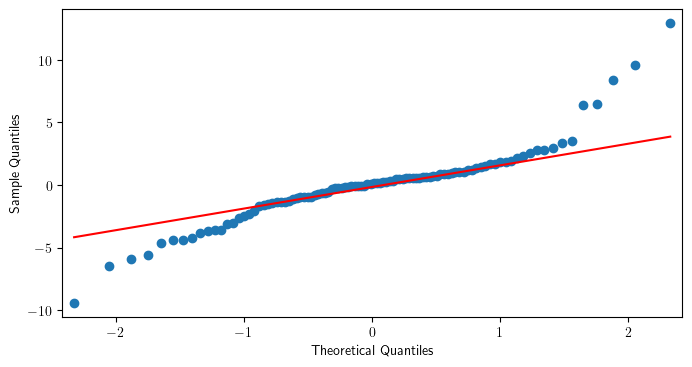

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(resultado_1.resid, ax=ax, line='q');

In [10]:
modelo_2 = smf.ols("y ~ x1 + x2 + x1 : x2", data)
resultado_2 = modelo_2.fit()
print(resultado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1119.
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           1.57e-74
Time:                        12:01:15   Log-Likelihood:                -77.990
No. Observations:                 100   AIC:                             164.0
Df Residuals:                      96   BIC:                             174.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9800      0.055     72.494      0.0

In [11]:
resultado_2.rsquared

0.972209883186191

In [12]:
z, p = stats.normaltest(resultado_2.resid)
p

0.5442003027882543

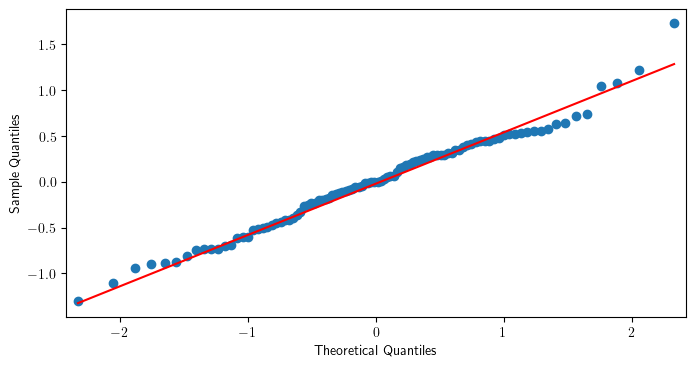

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(resultado_2.resid, ax=ax, line='q');

In [14]:
resultado_2.params

Intercept    3.979993
x1           0.971593
x2          -1.967837
x1:x2        2.993805
dtype: float64

In [15]:
N_new = 100
x = np.linspace(-1, 1, N_new)
X1, X2 = np.meshgrid(x, x)
datos_nuevos = pd.DataFrame({"x1": X1.ravel(), "x2": X2.ravel()})
y_pred = resultado_2.predict(datos_nuevos)

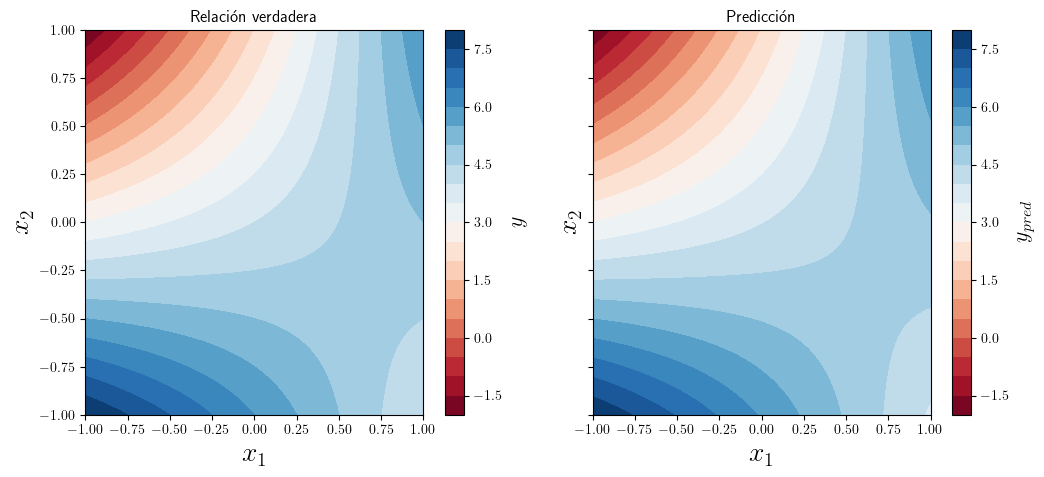

In [16]:
y_pred = y_pred.values.reshape(N_new, N_new)
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey = True)

def plot_y_contour(ax, Y, title, bar_title):
    c = ax.contourf(X1, X2, Y, 20, cmap=plt.cm.RdBu)
    ax.set_xlabel(r"$x_1$", fontsize=20)
    ax.set_ylabel(r"$x_2$", fontsize=20)
    ax.set_title(title)
    cb = fig.colorbar(c, ax=ax)
    cb.set_label(bar_title, fontsize=16)
    
plot_y_contour(axes[0], y(X1, X2), "Relación verdadera", r"$y$")
plot_y_contour(axes[1], y_pred, "Predicción", r"$y_{pred}$")


### Copyright 2020-2023 Facundo Batista y Manuel Carlevaro

Licencia CC BY-NC-SA 4.0

Para más info visitar: https://github.com/facundobatista/libro-pyciencia/

